## VirES - magnetic model benchmark - results viewer

Assess perfomance of the VirES magnetic model evaluation and other parameters wrt. the plain data rerival. 
Get per sample times.

See also [VirES Python Client](https://github.com/ESA-VirES/VirES-Python-Client)

In [1]:
import pandas as pd
import json

LABELS = [
    "plain request",
    "plain request (cached)",
    "filter: Flags_B != 255",
    "aux.var.: MLT,  QDLat",
    "aux.var.: MLT, QDLat",
    "model: CHAOS",
    "model: CHAOS80",
    "model: CHAOS-Static",
    "model: CHAOS-Static80",
    "model: CHAOS-Core",
    "model: CHAOS-MMA",
    "model: CHAOS-MMA-Primary",
    "model: CHAOS-MMA-Secondary",
    "model: MIO_SHA_2C",
    "model: MIO_SHA_2C-Primary",
    "model: MIO_SHA_2C-Secondary",
]

LABEL_ORDER = {label: index for index, label in enumerate(LABELS, 1)}


def load_data_form_json_log(filename):
    records = []
    with open(filename, encoding="utf8") as input_file:
        for line in input_file:
            record = json.loads(line)
            record["_labelSortingIndex"] = LABEL_ORDER.get(record["description"], 0)
            records.append(record)
    df = pd.DataFrame(records)
    df = df.sort_values('_labelSortingIndex')
    return df


In [2]:
from numpy import isnan
from matplotlib.pyplot import figure, subplot, colorbar
from matplotlib.colors import LogNorm

def plot_data(ax, df, label):
    y = df['description'].values
    x = 1e3 * df['requestDuration'].values / df['numberOfSamples'].values
    c = df['numberOfSamples'].values
    m = df['numberOfSamples'].values > 1e3
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.grid(color='whitesmoke', linestyle='dashed')
    h = ax.scatter(x[m], y[m], s=3, c=c[m], norm=LogNorm(1e3, 1e6), cmap='viridis_r')
    ax.set_xlabel("request duration per 1k samples / s")
    ax.set_title(label)
    ax.semilogx()
    cax = colorbar(h)
    ax.set_xlim([1e-3, 1e1])


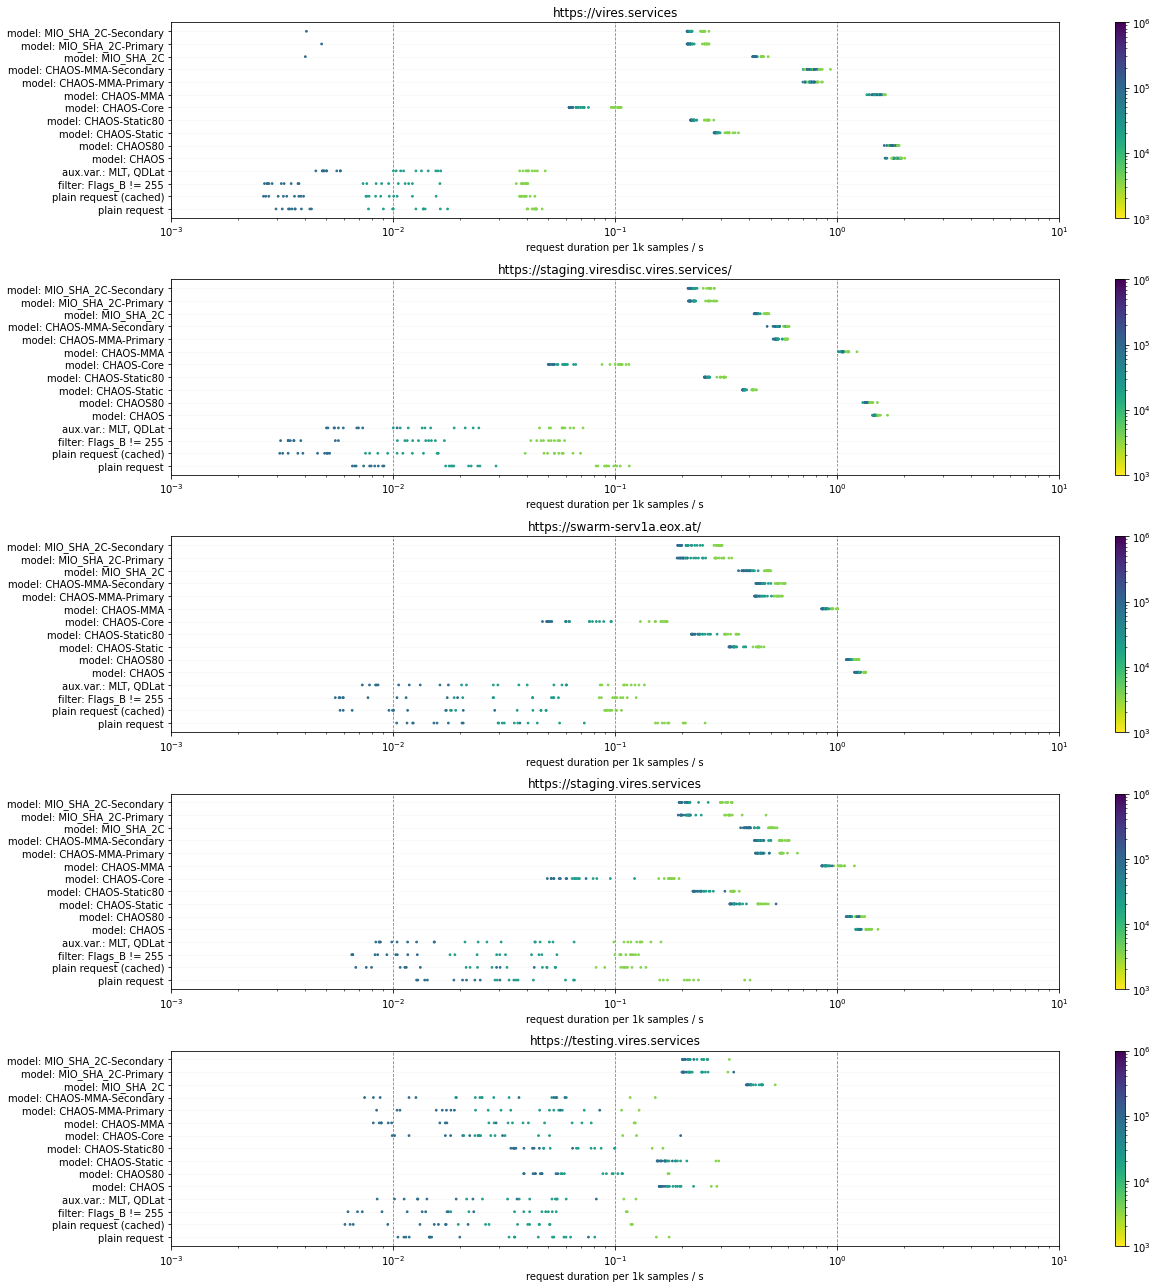

In [5]:
# initialial optimization results

df_production = load_data_form_json_log("results/2022-11-14_production_benchmark.log")
df_failover = load_data_form_json_log("results/2022-11-14_failover_benchmark.log")
df_testing = load_data_form_json_log("results/2022-11-14_testing_benchmark.log")
df_staging = load_data_form_json_log("results/2022-11-14_staging_benchmark.log")
df_disc = load_data_form_json_log("results/2022-11-14_disc_benchmark.log")


fig = figure(figsize=(18, 18))

ax = subplot(5, 1, 1)
plot_data(ax, df_production, "https://vires.services")

ax = subplot(5, 1, 2)
plot_data(ax, df_disc, "https://staging.viresdisc.vires.services/")

ax = subplot(5, 1, 3)
plot_data(ax, df_failover, "https://swarm-serv1a.eox.at/")

ax = subplot(5, 1, 4)
plot_data(ax, df_staging, "https://staging.vires.services")

ax = subplot(5, 1, 5)
plot_data(ax, df_testing, "https://testing.vires.services")




fig.tight_layout()

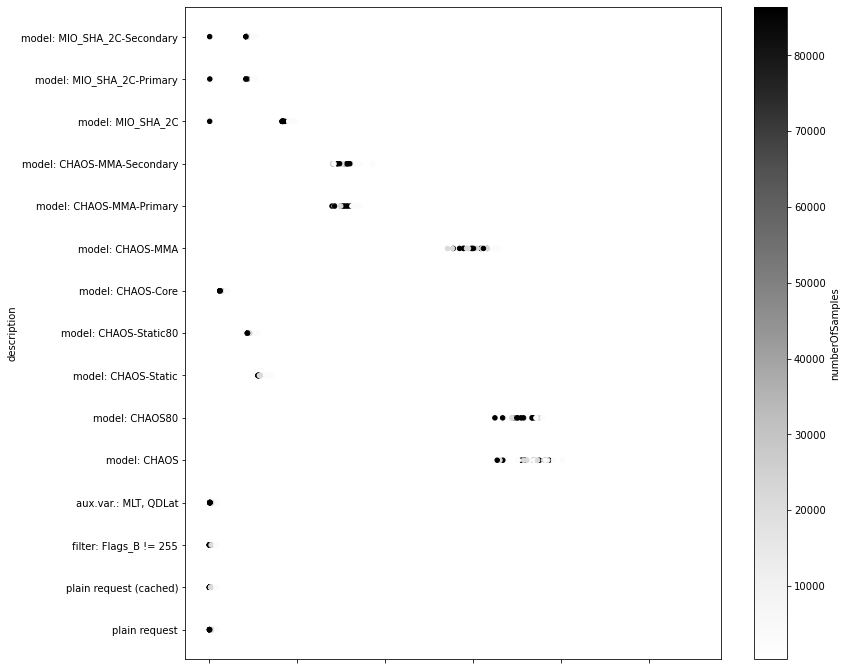

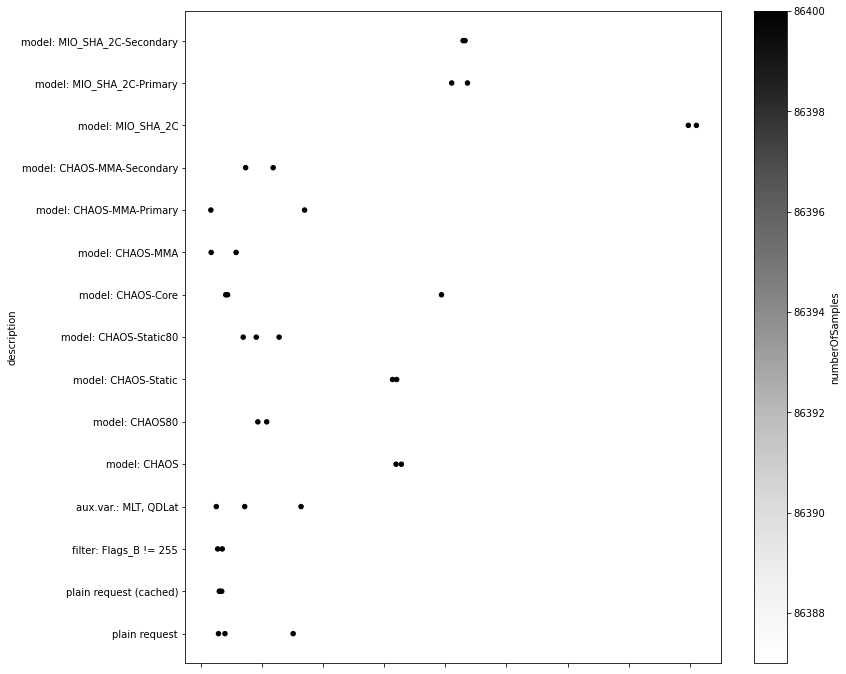

In [4]:
import matplotlib.pyplot as plt


def plot_dataframe(df):
    df['requestDurationPer1KSample'] = df.apply(lambda row: 1e3 * row.requestDuration / row.numberOfSamples if row.numberOfSamples else 0.0, axis=1)

    h = df.plot(
        kind="scatter", x="requestDurationPer1KSample", y="description", c="numberOfSamples",
        figsize=(12, 12)
    )

plot_dataframe(df_production)
plot_dataframe(df_testing)

